In [8]:
import pandas as pd
import numpy as np
import re 
import mObject
import matplotlib.pyplot as plt
import math
import MSUtils as msu

#Read in the table as a pd dataFrame, delimiting by commas, ignore the first two rows

df = msu.importFile('rawDataMS.csv', 2)


In [9]:
sampleDict = msu.createDict(df, 4)


sampleDict.keys()
sampleDict




{'2vv Nitric    4/24/2023 5:22:13 PM':                           Run      Time                                50Cr   
 0                         NaN       NaN  2vv Nitric    4/24/2023 5:22:13 PM  \
 1                           1  17:22:26                             592.019   
 2                           2  17:22:38                             567.018   
 3                           3  17:22:50                              609.02   
 4  Average counts from 3 runs       NaN                                589    
 5          standard deviation       NaN                                 21    
 6                        %RSD       NaN                                  4    
 
        52Cr     53Cr       54Cr       58Ni      60Ni     61Ni      62Ni   
 0       NaN      NaN        NaN        NaN       NaN      NaN       NaN  \
 1    7629.2  133.001  198883.98   21801.11  8242.735  370.008  1167.075   
 2  7510.101  134.001  193780.52  21573.568   8114.62  396.009  1169.075   
 3  7379.994  12

In [10]:
#Transfrom the dictionary into a big dataframe, with key as a column(Sample Name) and all other information as rows
#USELESS FUNCTION!!
def transformDict(sampleDict):
    df = pd.DataFrame()
    #Create a new column called "Sample Name"
    df['Sample Name'] = sampleDict.keys()
    #Columns that contrains the triple (Average counts from 3 runs, Standard Deviation, %RSD)
    #Loop through the columns to create the columns for the triple, column num - 2(2 columns are Name and run)
    for i in range(len(sampleDict.get('.1 ppm NiCr    4/24/2023 5:24:50 PM').columns) - 2):
        df[sampleDict.get('.1 ppm NiCr    4/24/2023 5:24:50 PM').columns[i+2]] = np.nan
    #Fill the Triples into the dataframe, loop through the sampleDict
    for i in sampleDict.keys():
        #Get column names from 50 Cr to the end
        columns = sampleDict.get(i).columns[2:]
        for names in columns:
            print(names)
    return df



In [11]:
trimmedDict = msu.trimDictionary(sampleDict)
trimmedDict.keys()



dict_keys(['2vvNitric', '.1ppmNiCr', '1ppmNiCr', '5ppmNiCr', '20ppmNiCr', '10B1[01]01A', '10D1[01]04A', '10D1[01]05A', 'UndigCrF3', '10D[01]303', 'UndigCrF2', '10D[01]302'])

In [12]:
trimmedDict.get('10D[01]302')

,Run,Time,50Cr,52Cr,53Cr,54Cr,58Ni,60Ni,61Ni,62Ni,64Ni
104,NaN,NaN,10D [01] 302 4/24/2023 5:59:59 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,1,18:00:11,35558503,790466560,95749063,25748657,231194.9,86824.648,3893.834,12521.618,264267.01
106,2,18:00:24,35711889,790956570,95979315,25824112,236770.68,89672.089,3975.869,13118.458,265323.11
107,3,18:00:36,35501347,791389200,96115818,25871697,237490.09,89707.435,4059.906,12998.286,264913.42
108,Average counts from 3 runs,NaN,35590580,790937440,95948065,25814822,235151.89,88734.724,3976.536,12879.454,264834.51
109,standard deviation,NaN,108874.99,461618.35,185363.92,62044.004,3445.682,1654.269,83.038,315.667,532.454
110,%RSD,NaN,0.306,0.058,0.193,0.24,1.465,1.864,2.088,2.451,0.201


In [13]:
calibrationCurve = msu.calibrationCurvesDict(trimmedDict)

calibrationCurve.keys()



dict_keys(['.1', '1', '5', '20'])

In [14]:

#Each value in the diciontary is a pandas table with 6 rows of information, with the last 3 being the average counts, standard deviation, and %RSD
#Create objects for each sample, with the name, average counts, standard deviation, and %RSD

#Sample Dict is from CREATEDICTI function !!!!!!
def extractColumnEleNames(sampleDict):
    for i in sampleDict.keys():
        elelist = sampleDict.get(i).columns[2:].tolist()
        break
    return elelist

def extractCalibrationName(trimmedDict):
    a = []
    for i in trimmedDict.keys():
        if 'ppm' in i:
            a.append(i)

    return a 
        

extractCalibrationName(trimmedDict)



['.1ppmNiCr', '1ppmNiCr', '5ppmNiCr', '20ppmNiCr']

In [15]:
def ccurve(eleName, trimmedDict):
    calibrationSampleNames = extractCalibrationName(trimmedDict)
    xarr = []
    yarr = []
    #This loop gets the calibration x numbers out of the array 
    for ppmNames in calibrationSampleNames:
        match = re.match(r'^(.*?)(p|$)', ppmNames)
        if match:
            xarr.append(float(match[1]))
    for ppmNames in calibrationSampleNames:
        #Potential bug: the iloc4 might not awlasy be the average !!
        a = float(trimmedDict.get(ppmNames).iloc[4][eleName].replace(' ', '').replace(',', ''))
        yarr.append(a)
    #record the mx + b and return later

    coef = np.polyfit(xarr,yarr,1)
    poly1d_fn = np.poly1d(coef) 
    slope = coef[0]
    intercept = coef[1]
    #Have a caption box with slope and intercept at the UPPER corner with a box around it
    #plt.text(0.5, 0.5, 'Slope: ' + str(slope) + '\n' + 'Intercept: ' + str(intercept), bbox=dict(facecolor='red', alpha=0.5))
    #plt.plot(xarr, yarr, 'yo', xarr, poly1d_fn(xarr), '--k')


    #plt.title("Calibration Curve for " + eleName)
    #plt.ylabel("Average Counts from 3 runs")
    #return (slope, intercept)
    return xarr, yarr, slope, intercept





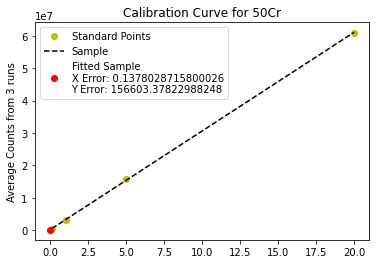

In [16]:
def concentrationCalculation(trimmedDict, sampleName, element):

    curve = ccurve(element, trimmedDict)
    #Find the sample name in the trimmedDict and get the average counts
    y = float(trimmedDict.get(sampleName).iloc[4][element].replace(' ', '').replace(',', ''))
    #given the Y, find the X
    x = (y- curve[3]) / curve[2]
    return x, y


def errorCalculation(m,k,n, intercept, xarr,yarr, elementConcentraionX, elementConcentrationY):
    #M is slope 
    #k is number of replicate measurements of the unknown
    #n is number of replicate measurements of the calibration curve
    #xarr is the x values of the calibration curve
    #yarr is the y values of the calibration curve
    #fix can't multiply sequence by non-int of type 'numpy.float64'
    #DEFINITLY SOMETHING WRONG WITH THE ERROR CALCULATION CONSULT WITH GURUS ON SEP 20!
    m = float(m)
    k = float(k)
    n = float(n)
    S_y = 0
    S_x = 0
    yCurve = []
    for i in xarr:
        yCurve.append(m*i + intercept)
    
    ydiffSquared = []
    for i in range(len(yarr)):
        ydiffSquared.append((yarr[i] - yCurve[i])**2)
    xsquareDiff = []
    for i in range(len(xarr)):
        xsquareDiff.append((xarr[i] - np.mean(xarr))**2)

    xdiffSQ = np.sum(xsquareDiff)
    ydiffSQ = np.sum(ydiffSquared)
    


    S_y = np.sqrt(ydiffSQ / (n - 2))
    S_x = (S_y/abs(m))*np.sqrt( (1/k) + (1/n) + ( ydiffSQ/(m**2)*xdiffSQ   )       )


    return S_x, S_y



def cCurveWithSample(eleName, trimmedDict, sampleName, sampleFittedX, sampleFittedY, xError, yError):
    calibrationSampleNames = extractCalibrationName(trimmedDict)
    xarr = []
    yarr = []
    #This loop gets the calibration x numbers out of the array 
    for ppmNames in calibrationSampleNames:
        match = re.match(r'^(.*?)(p|$)', ppmNames)
        if match:
            xarr.append(float(match[1]))
    for ppmNames in calibrationSampleNames:
        #Potential bug: the iloc4 might not awlasy be the average !!
        a = float(trimmedDict.get(ppmNames).iloc[4][eleName].replace(' ', '').replace(',', ''))
        yarr.append(a)
    #record the mx + b and return later

    coef = np.polyfit(xarr,yarr,1)
    poly1d_fn = np.poly1d(coef) 
    slope = coef[0]
    intercept = coef[1]
    #Have a caption box with slope and intercept at the UPPER corner with a box around it
    plt.plot(xarr, yarr, 'yo', xarr, poly1d_fn(xarr), '--k')
    plt.plot(sampleFittedX, sampleFittedY, 'ro')


    #Legend to show dotted line is the calibration curve, slope and intercept, as well as the calculated errors
    plt.legend(['Standard Points', 'Sample', "Fitted Sample" + '\n' + 'X Error: ' + str(xError) + '\n' + 'Y Error: ' + str(yError)])



    plt.title("Calibration Curve for " + eleName)
    plt.ylabel("Average Counts from 3 runs")
    plt.show()

    #print("Current X values are " + str(xarr), "which are the standard ppm values")
    #print("Current Y values are " + str(yarr), "which are the average counts from 3 runs")
    #print("The fitted sample is " + sampleName + " with the fitted X value of " + str(sampleFittedX) + " and concentration value of " + str(sampleFittedY))
    


elename = '50Cr'
sampleName = 'UndigCrF3'
xarr, yarr  = ccurve(elename, trimmedDict)[0], ccurve(elename, trimmedDict)[1]
elementConcentrationX = concentrationCalculation(trimmedDict, sampleName, elename)[0]
elementConcentrationY = concentrationCalculation(trimmedDict, sampleName, elename)[1]
xError = errorCalculation(ccurve(elename, trimmedDict)[2], 3, 12, ccurve(elename, trimmedDict)[3], xarr, yarr, elementConcentrationX, elementConcentrationY)[0]
yError = errorCalculation(ccurve(elename, trimmedDict)[2], 3, 12, ccurve(elename, trimmedDict)[3], xarr, yarr, elementConcentrationX, elementConcentrationY)[1]
cCurveWithSample(elename, trimmedDict, sampleName, elementConcentrationX, elementConcentrationY, xError, yError)








#Confidence and prediction bands 




In [ ]:
trimmedDict = msu.trimDictionary(sampleDict)
trimmedDict.keys()
transformed.loc[key1 + str(indexer % 3 )] = trimmedDict.get(key1).iloc[3 + indexer][2:]
        


In [51]:
def tableFormatter(trimmedDict, numRuns, df):
    colnames = df.columns[2:].insert(0, 'ele')
    
    transformed = pd.DataFrame(columns = colnames)
    for keys in trimmedDict.keys():
        for i in range(numRuns):
            a = trimmedDict.get(keys).iloc[1 + i][2:].tolist()
            
            a.insert(0, keys)
            transformed.loc[keys + ' run ' + str(i)] = a
            


    return transformed





    

In [52]:
tableFormatter(trimmedDict,3, df)

,ele,50Cr,52Cr,53Cr,54Cr,58Ni,60Ni,61Ni,62Ni,64Ni
2vvNitric run 0,2vvNitric,592.019,7629.2,133.001,198883.98,21801.11,8242.735,370.008,1167.075,802.035
2vvNitric run 1,2vvNitric,567.018,7510.101,134.001,193780.52,21573.568,8114.62,396.009,1169.075,809.036
2vvNitric run 2,2vvNitric,609.02,7379.994,128.001,188662.54,21004.237,7846.385,323.006,1119.069,813.036
.1ppmNiCr run 0,.1ppmNiCr,267438.77,6997041.5,676365.45,521919.96,4243503.1,1353106.3,60963.729,198788.93,1399062.6
.1ppmNiCr run 1,.1ppmNiCr,281226.61,7374526.3,713934.44,542301.53,4358725.7,1418253.2,63298.605,208571.48,1472068.3
.1ppmNiCr run 2,.1ppmNiCr,284769.37,7426923.4,875399.06,544842.94,4369767.2,1429358.7,63852.458,211618.7,1484774.4
1ppmNiCr run 0,1ppmNiCr,3059511.9,70001948,8242574.1,2190861.5,40833371,17280105,605482.67,2035401.3,791930.79
1ppmNiCr run 1,1ppmNiCr,3193055.1,72565661,8567504.6,2306736.6,42044600,17791204,633356.02,2139324,826461.76
1ppmNiCr run 2,1ppmNiCr,3283219.4,74187507,8760377,2726026.8,42721802,18073544,644822.52,2191393.8,849695.12
5ppmNiCr run 0,5ppmNiCr,15436632,345979840,41195008,11432141,199729720,84823111,3584543.3,12007933,3711067.4
